<h1>Лабораторная работа 3.</h1>
<h2>Работа с дифференциальными уравнениями в SageMath (с примерами из книги "Введение в научный Python").</h2>

<h2>1. Модель "Хищник-Жертва" (стр. 247).</h2>

**Код из книги "Введение в научный Python":**

(0.0, 3.0)

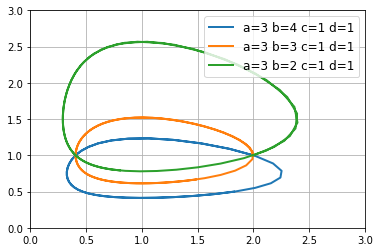

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(y, t,params):
    y1, y2 = y
    a,b,c,d=params
    return [y1*(a-b*y2),y2*(-c+d*y1)]

t = np.linspace(0,7,71)
y0 = [2, 1]
fig = plt.figure(facecolor='white')

for b in range(4,1,-1):
    params=[3,b,1,1]
    st='a=%d b=%d c=%d d=%d' % tuple(params)
    [y1,y2]=odeint(f, y0, t,args=(params,), full_output=False).T
    plt.plot(y1,y2,linewidth=2, label=st)

plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0,3)
plt.ylim(0,3)

**Код адаптированный под SageMath:**

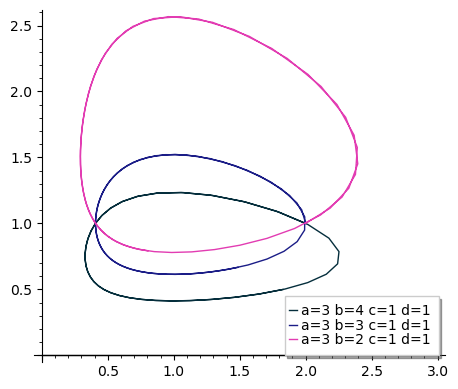

In [2]:
import numpy as np

var ("y1, y2")

t = np.linspace(0, 7, 71) # интервал, на котором будем искать решение
y0 = [2, 1] # начальные условия
a, c, d = 3, 1, 1 # параметры для функции

pt = plot(0, (x, 0, 3), color='black')

for b in range(4, 1, -1):
    params = [a, b, c , d]
    st = 'a=%d b=%d c=%d d=%d' % tuple(params)
    f = [y1 * (a - b * y2), y2 * (-c + d * y1)]
    sol = desolve_odeint(f, y0, t, dvars = [y1, y2])
    pt += line(sol, rgbcolor=(randint(0,256)/256,randint(0,256)/256,randint(0,256)/256), legend_label=st)
    
pt.show(aspect_ratio=1)

<h2>2. Падение тела, брошенного под углом к горизонту (стр. 258).</h2>

**Код из книги "Введение в научный Python":**

In [3]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

ts = [ ]
ys = [ ]
def fout(t, y): # обработчик шага
    ts.append(t)
    ys.append(list(y.copy()))

def f(t, y): # функция правой части системы ОДУ
    k=0.01
    g=9.81
    y1, y2, y3, y4 = y
    return [y2,
    -k*y2*sqrt(y2**2+y4**2),
    y4,
    -k*y4*sqrt(y2**2+y4**2)-g]

Решаем ОДУ и строим его график.

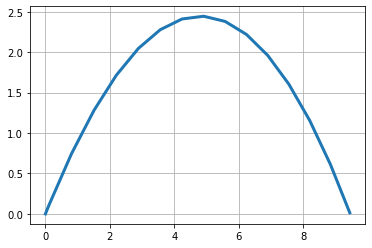

In [4]:
tmax=1.41 # время движения, подбирается экспериментально
alph=np.pi/4 # угол бросания тела
v0=10.0 # начальная скорость
ODE=ode(f)
y0,t0=[0, v0*np.cos(alph), 0, v0*np.sin(alph)], 0 # начальные условия

r=ODE.set_integrator('dopri5', max_step=0.1) # метод Рунге – Кутта
r.set_solout(fout) # загрузка обработчика шага
r=ODE.set_initial_value(y0, t0) # задание начальных значений
ret = r.integrate(tmax) # решаем ОДУ

Y=np.array(ys)

fig, ax = plt.subplots()
fig.set_facecolor('white')
ax.plot(Y[:,0],Y[:,2],linewidth=3) # график решения
ax.grid(True)

**Код адаптированный под SageMath:**

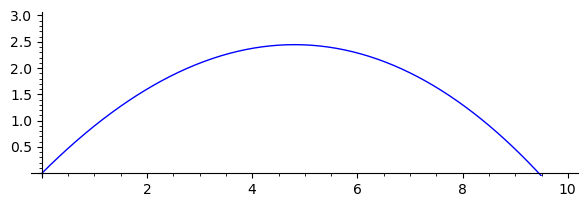

In [5]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

ts = [ ]
ys = [ ]

tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi / 4 # угол бросания тела
v0 = 10.0 # начальная скорость
y0,t0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)], 0 # начальные условия

var('y1, y2, y3, y4')

t = np.linspace(0, 7, 300) # интервал, на котором ищем решения

k = 0.01
g = 9.81
f = [y2,
    -k * y2 * sqrt(y2**2 + y4**2),
    y4,
    -k * y4 * sqrt(y2**2 + y4**2) - g] # функция правой части системы ОДУ

sol = desolve_odeint(f, y0, t, dvars = [y1, y2, y3, y4]) # решаем ДУ численно

Y = np.array(sol)
    
arr = zip(Y[:,0], Y[:,2])
    
line(arr).show(xmax = 10, ymin=0, ymax=3, aspect_ratio = 1)